## Observations
o	Starting around the months of April unemployment peaked till June 2020 and started to drop in July 2020.  
o	The county with the highest unemployment rate during the peak was Atlantic County
o    A significant outlier before Covid was Cape May County

o	Pre-Covid, Cape May County had the highest unemployment rate at 6.9%
o	Pre Covid, Hunderton County had the lowest unemployment rate at 2.6%
o	2020, Atlantic County became the county with the highest unemployment rate changing from 4.9% to 17.8%
o	Hunterton County remains the county with the lowest unemployment rate at 7.2%

o	There is a negative correlation between number of vaccines administered and unemployment rates.  As number of vaccines administered increased, the rate of unemployment throughout all counties decreased.  
o	Vaccines administered started to plateau in June 2021 and similarly, unemployment rates also plateaued. 
o	In conclusion, the data shows a correlation between vaccines administered and the unemployment rates in NJ.  An increase in number of vaccines administered corresponded with a decrease in unemployment rates in NJ.

In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from datetime import datetime

In [3]:
file = '2019_emp.xlsx'

In [4]:
#merge excel files
county1 = pd.read_excel(file, sheet_name=3, header=None, skiprows=13)
county2 = pd.read_excel(file, sheet_name=4, header=None, skiprows=13)
county3 = pd.read_excel(file, sheet_name=5, header=None, skiprows=13)

In [5]:
#creating a list
example = ["JAN'19", "FEB'19", "MAR'19", "APR'19", "MAY'19", "JUN'19", "JUL'19", "AUG'19", "SEP'19", "OCT'19", 
                  "NOV'19", "DEC'19"]
#intruducing an empty list
new_list = [] 
# using datetime.strptime formula in a for loop to ensure dates are in order once dataset are merged 
for month in example:
    new_date = datetime.strptime(month, "%b'%y").strftime("%m %Y") 
#adding to empty list  
    new_list.append(new_date)
new_list.append("ANN. AV.'19'")
columns_list = ["County"] + new_list
columns_list

['County',
 '01 2019',
 '02 2019',
 '03 2019',
 '04 2019',
 '05 2019',
 '06 2019',
 '07 2019',
 '08 2019',
 '09 2019',
 '10 2019',
 '11 2019',
 '12 2019',
 "ANN. AV.'19'"]

In [6]:
# doing the same as above to this dataset for the following year
example2 = ["JAN'20", "FEB'20", "MAR'20", "APR'20", "MAY'20", "JUN'20", "JUL'20", "AUG'20", "SEP'20", "OCT'20", 
                  "NOV'20", "DEC'20"]
new_list = [] 
for month in example2:
    new_date = datetime.strptime(month, "%b'%y").strftime("%m %Y")
    new_list.append(new_date)
new_list.append("ANN. AV.'20'")
columns_list2 = ["County"] + new_list
columns_list2

['County',
 '01 2020',
 '02 2020',
 '03 2020',
 '04 2020',
 '05 2020',
 '06 2020',
 '07 2020',
 '08 2020',
 '09 2020',
 '10 2020',
 '11 2020',
 '12 2020',
 "ANN. AV.'20'"]

In [7]:
# doing the same as above to this dataset for the following year
example3 = ["JAN'21", "FEB'21", "MAR'21", "APR'21", "MAY'21", "JUN'21", "JUL'21", "AUG'21", "SEP'21", "OCT'21", 
                  "NOV'21", "DEC'21"]
new_list = [] 
for month in example3:
    new_date = datetime.strptime(month, "%b'%y").strftime("%m %Y")
    new_list.append(new_date)
new_list.append("ANN. AV.'21'")
columns_list3 = ["County"] + new_list
columns_list3

['County',
 '01 2021',
 '02 2021',
 '03 2021',
 '04 2021',
 '05 2021',
 '06 2021',
 '07 2021',
 '08 2021',
 '09 2021',
 '10 2021',
 '11 2021',
 '12 2021',
 "ANN. AV.'21'"]

In [8]:
# here is the result of the above code for the next 3 cells
county1.columns = columns_list
county1

,County,01 2019,02 2019,03 2019,04 2019,05 2019,06 2019,07 2019,08 2019,09 2019,10 2019,11 2019,12 2019,ANN. AV.'19'
0,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County
1,Atlantic County Labor Force,118900,119900,120100,119300,120100,123300,125500,125000,122800,123000,121600,121300,121700
2,Atlantic County Employment,111200,112700,113600,114200,115100,117900,119400,119300,117500,117500,116000,115400,115800
3,Atlantic County Unemployment,7700,7200,6400,5100,5000,5400,6100,5700,5300,5500,5600,5900,5900
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,4.5,4.6,4.9,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4459100,4488800,4482700,4455600,4477800,4538900,4584000,4555500,4525500,4563800,4564200,4570400,4522200
107,New Jersey Employment,4272200,4308800,4320800,4326900,4343400,4391500,4412100,4394800,4380300,4417500,4416800,4421900,4367300
108,New Jersey Unemployment,186800,180000,161900,128800,134300,147400,171900,160700,145300,146200,147400,148500,154900


In [9]:
county2.columns = columns_list2
county2

,County,01 2020,02 2020,03 2020,04 2020,05 2020,06 2020,07 2020,08 2020,09 2020,10 2020,11 2020,12 2020,ANN. AV.'20'
0,Atlantic County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,120900.0,122700.0,122900.0,122800.0,120800.0,123200.0,128300.0,123000.0,116600.0,115900.0,120300.0,114800.0,121000.0
2,Atlantic County Employment,113200.0,115400.0,115300.0,80600.0,77400.0,80600.0,98600.0,101700.0,103000.0,103600.0,103200.0,101900.0,99500.0
3,Atlantic County Unemployment,7600.0,7300.0,7600.0,42200.0,43500.0,42600.0,29700.0,21400.0,13600.0,12300.0,17100.0,12900.0,21500.0
4,Atlantic County Unemployment Rate (%),6.3,6.0,6.2,34.4,36.0,34.6,23.1,17.4,11.7,10.6,14.2,11.3,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4568400.0,4596000.0,4560300.0,4439000.0,4467300.0,4521300.0,4657000.0,4548000.0,4348300.0,4370900.0,4492700.0,4372800.0,4495200.0
107,New Jersey Employment,4381700.0,4414700.0,4370400.0,3709700.0,3724500.0,3792100.0,4025600.0,4053400.0,4015300.0,4060100.0,4059300.0,4056500.0,4055300.0
108,New Jersey Unemployment,186700.0,181400.0,189900.0,729300.0,742800.0,729200.0,631400.0,494600.0,333000.0,310700.0,433400.0,316400.0,439900.0


In [10]:
county3.columns = columns_list3
county3 = county3.iloc[:, :-8]


county3

,County,01 2021,02 2021,03 2021,04 2021,05 2021
0,Atlantic County,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,115300.0,116600.0,117100.0,116600.0,117600.0
2,Atlantic County Employment,100800.0,102100.0,103400.0,104000.0,105700.0
3,Atlantic County Unemployment,14400.0,14500.0,13600.0,12600.0,11900.0
4,Atlantic County Unemployment Rate (%),12.5,12.4,11.6,10.8,10.1
...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4373300.0,4403200.0,4439200.0,4391800.0,4390200.0
107,New Jersey Employment,4023900.0,4040100.0,4092300.0,4081300.0,4088900.0
108,New Jersey Unemployment,349300.0,363100.0,346800.0,310500.0,301200.0


In [11]:
#work out the columns that are only in one DataFrame and use this to select a subset of columns in the merge.
columns_to_use = county2.columns.difference(county1.columns)
county_complete= pd.merge(county1, county2[columns_to_use], left_index=True, right_index=True, how="outer")
county_complete

,County,01 2019,02 2019,03 2019,04 2019,05 2019,06 2019,07 2019,08 2019,09 2019,...,04 2020,05 2020,06 2020,07 2020,08 2020,09 2020,10 2020,11 2020,12 2020,ANN. AV.'20'
0,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,118900,119900,120100,119300,120100,123300,125500,125000,122800,...,122800.0,120800.0,123200.0,128300.0,123000.0,116600.0,115900.0,120300.0,114800.0,121000.0
2,Atlantic County Employment,111200,112700,113600,114200,115100,117900,119400,119300,117500,...,80600.0,77400.0,80600.0,98600.0,101700.0,103000.0,103600.0,103200.0,101900.0,99500.0
3,Atlantic County Unemployment,7700,7200,6400,5100,5000,5400,6100,5700,5300,...,42200.0,43500.0,42600.0,29700.0,21400.0,13600.0,12300.0,17100.0,12900.0,21500.0
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,...,34.4,36.0,34.6,23.1,17.4,11.7,10.6,14.2,11.3,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4459100,4488800,4482700,4455600,4477800,4538900,4584000,4555500,4525500,...,4439000.0,4467300.0,4521300.0,4657000.0,4548000.0,4348300.0,4370900.0,4492700.0,4372800.0,4495200.0
107,New Jersey Employment,4272200,4308800,4320800,4326900,4343400,4391500,4412100,4394800,4380300,...,3709700.0,3724500.0,3792100.0,4025600.0,4053400.0,4015300.0,4060100.0,4059300.0,4056500.0,4055300.0
108,New Jersey Unemployment,186800,180000,161900,128800,134300,147400,171900,160700,145300,...,729300.0,742800.0,729200.0,631400.0,494600.0,333000.0,310700.0,433400.0,316400.0,439900.0


In [12]:
columns_to_use = county3.columns.difference(county_complete.columns)
county_full= pd.merge(county_complete, county3[columns_to_use], left_index=True, right_index=True, how="outer")
county_full

,County,01 2019,02 2019,03 2019,04 2019,05 2019,06 2019,07 2019,08 2019,09 2019,...,09 2020,10 2020,11 2020,12 2020,ANN. AV.'20',01 2021,02 2021,03 2021,04 2021,05 2021
0,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,118900,119900,120100,119300,120100,123300,125500,125000,122800,...,116600.0,115900.0,120300.0,114800.0,121000.0,115300.0,116600.0,117100.0,116600.0,117600.0
2,Atlantic County Employment,111200,112700,113600,114200,115100,117900,119400,119300,117500,...,103000.0,103600.0,103200.0,101900.0,99500.0,100800.0,102100.0,103400.0,104000.0,105700.0
3,Atlantic County Unemployment,7700,7200,6400,5100,5000,5400,6100,5700,5300,...,13600.0,12300.0,17100.0,12900.0,21500.0,14400.0,14500.0,13600.0,12600.0,11900.0
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,...,11.7,10.6,14.2,11.3,17.8,12.5,12.4,11.6,10.8,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4459100,4488800,4482700,4455600,4477800,4538900,4584000,4555500,4525500,...,4348300.0,4370900.0,4492700.0,4372800.0,4495200.0,4373300.0,4403200.0,4439200.0,4391800.0,4390200.0
107,New Jersey Employment,4272200,4308800,4320800,4326900,4343400,4391500,4412100,4394800,4380300,...,4015300.0,4060100.0,4059300.0,4056500.0,4055300.0,4023900.0,4040100.0,4092300.0,4081300.0,4088900.0
108,New Jersey Unemployment,186800,180000,161900,128800,134300,147400,171900,160700,145300,...,333000.0,310700.0,433400.0,316400.0,439900.0,349300.0,363100.0,346800.0,310500.0,301200.0


In [13]:

county_full_rows= county_full.iloc[range(4, len(county_full), 5)]
county_full_rows

,County,01 2019,02 2019,03 2019,04 2019,05 2019,06 2019,07 2019,08 2019,09 2019,...,09 2020,10 2020,11 2020,12 2020,ANN. AV.'20',01 2021,02 2021,03 2021,04 2021,05 2021
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,...,11.7,10.6,14.2,11.3,17.8,12.5,12.4,11.6,10.8,10.1
9,Bergen County Unemployment Rate (%),3.3,3.2,2.9,2.3,2.5,2.7,3.2,3,2.7,...,7.8,7.2,9.5,7.0,9.6,7.6,7.8,7.4,6.8,6.7
14,Burlington County Unemployment Rate (%),3.8,3.7,3.3,2.6,2.8,3,3.6,3.4,3,...,6.2,5.8,8.0,6.0,8.2,6.6,7.0,6.5,5.8,5.7
19,Camden County Unemployment Rate (%),4.7,4.4,4,3.3,3.4,3.8,4.3,4.1,3.7,...,7.7,7.3,10.0,7.6,10.1,8.3,8.6,8.1,7.4,7.2
24,Cape May County Unemployment Rate (%),13.3,11.8,10.7,7.5,5,4.2,3.9,3.6,4,...,7.4,7.3,12.0,10.3,13.8,12.9,13.4,12.6,10.0,8.2
29,Cumberland County Unemployment Rate (%),6.8,6.5,5.8,4.5,4.3,4.7,5.7,5.3,4.6,...,7.9,7.2,10.2,8.4,10.8,9.8,10.1,9.5,8.2,7.8
34,Essex County Unemployment Rate (%),5,4.7,4.3,3.6,3.8,4.2,4.7,4.5,4.2,...,9.9,9.3,12.5,9.4,11.7,10.0,10.1,9.7,9.0,8.7
39,Gloucester County Unemployment Rate (%),4.3,4.1,3.6,2.9,3.1,3.4,4,3.7,3.3,...,6.8,6.3,8.8,6.7,9.3,7.6,8.0,7.4,6.7,6.5
44,Hudson County Unemployment Rate (%),3.7,3.5,3.2,2.6,2.8,3.1,3.5,3.3,3,...,9.1,8.4,11.1,8.1,10.6,8.7,8.8,8.4,7.8,7.6
49,Hunterdon County Unemployment Rate (%),3.4,3.3,2.9,2.1,2.3,2.5,2.9,2.7,2.5,...,5.3,5.0,7.0,5.2,7.2,5.9,6.3,5.9,5.1,5.0


In [14]:
county_full_rows_transposed= county_full_rows.T
#iloc[] secrues row 1-32 and drops row 0
county_full_rows_transposed= county_full_rows_transposed.iloc[1:32]
county_full_rows_transposed.columns =["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                                      "Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                                      "Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren", "New Jersey"]
county_full_rows_transposed

,Atlantic,Bergen,Burlington,Camden,Cape May,Cumberland,Essex,Gloucester,Hudson,Hunterton,...,Monmouth,Morris,Ocean,Passaic,Salem,Somerset,Sussex,Union,Warren,New Jersey
01 2019,6.5,3.3,3.8,4.7,13.3,6.8,5,4.3,3.7,3.4,...,3.8,3.3,4.6,5.1,5.6,3.4,4.2,4.3,4.1,4.2
02 2019,6,3.2,3.7,4.4,11.8,6.5,4.7,4.1,3.5,3.3,...,3.7,3.2,4.4,4.9,5.4,3.4,4.1,4.1,3.9,4
03 2019,5.3,2.9,3.3,4,10.7,5.8,4.3,3.6,3.2,2.9,...,3.3,2.9,3.9,4.4,4.9,3,3.7,3.8,3.6,3.6
04 2019,4.3,2.3,2.6,3.3,7.5,4.5,3.6,2.9,2.6,2.1,...,2.6,2.3,3,3.6,3.9,2.4,2.7,3,2.7,2.9
05 2019,4.2,2.5,2.8,3.4,5,4.3,3.8,3.1,2.8,2.3,...,2.7,2.4,3,3.6,3.9,2.6,2.8,3.1,2.7,3
06 2019,4.4,2.7,3,3.8,4.2,4.7,4.2,3.4,3.1,2.5,...,2.9,2.6,3.2,3.9,4.4,2.8,3,3.4,3.1,3.2
07 2019,4.9,3.2,3.6,4.3,3.9,5.7,4.7,4,3.5,2.9,...,3.3,3,3.7,4.6,5,3.2,3.6,3.9,3.7,3.8
08 2019,4.6,3,3.4,4.1,3.6,5.3,4.5,3.7,3.3,2.7,...,3.1,2.8,3.4,4.4,4.8,3,3.3,3.7,3.4,3.5
09 2019,4.3,2.7,3,3.7,4,4.6,4.2,3.3,3,2.5,...,2.8,2.6,3.2,3.8,4.4,2.8,3,3.4,2.9,3.2
10 2019,4.5,2.7,3,3.7,5.3,4.7,4.1,3.3,3,2.4,...,2.8,2.5,3.2,3.8,4.4,2.7,3,3.3,2.9,3.2


In [15]:
county_full_rows_transposed.index.name = "Months"
county_full_rows_transposed


,Atlantic,Bergen,Burlington,Camden,Cape May,Cumberland,Essex,Gloucester,Hudson,Hunterton,...,Monmouth,Morris,Ocean,Passaic,Salem,Somerset,Sussex,Union,Warren,New Jersey
Months,,,,,,,,,,,,,,,,,,,,,
01 2019,6.5,3.3,3.8,4.7,13.3,6.8,5,4.3,3.7,3.4,...,3.8,3.3,4.6,5.1,5.6,3.4,4.2,4.3,4.1,4.2
02 2019,6,3.2,3.7,4.4,11.8,6.5,4.7,4.1,3.5,3.3,...,3.7,3.2,4.4,4.9,5.4,3.4,4.1,4.1,3.9,4
03 2019,5.3,2.9,3.3,4,10.7,5.8,4.3,3.6,3.2,2.9,...,3.3,2.9,3.9,4.4,4.9,3,3.7,3.8,3.6,3.6
04 2019,4.3,2.3,2.6,3.3,7.5,4.5,3.6,2.9,2.6,2.1,...,2.6,2.3,3,3.6,3.9,2.4,2.7,3,2.7,2.9
05 2019,4.2,2.5,2.8,3.4,5,4.3,3.8,3.1,2.8,2.3,...,2.7,2.4,3,3.6,3.9,2.6,2.8,3.1,2.7,3
06 2019,4.4,2.7,3,3.8,4.2,4.7,4.2,3.4,3.1,2.5,...,2.9,2.6,3.2,3.9,4.4,2.8,3,3.4,3.1,3.2
07 2019,4.9,3.2,3.6,4.3,3.9,5.7,4.7,4,3.5,2.9,...,3.3,3,3.7,4.6,5,3.2,3.6,3.9,3.7,3.8
08 2019,4.6,3,3.4,4.1,3.6,5.3,4.5,3.7,3.3,2.7,...,3.1,2.8,3.4,4.4,4.8,3,3.3,3.7,3.4,3.5
09 2019,4.3,2.7,3,3.7,4,4.6,4.2,3.3,3,2.5,...,2.8,2.6,3.2,3.8,4.4,2.8,3,3.4,2.9,3.2


In [16]:
#Created a dataframe to drop the annual averages
county_full_rows_transposed=county_full_rows_transposed.drop(labels=["ANN. AV.'19'", "ANN. AV.'20'"], axis=0)
county_full_rows_transposed


,Atlantic,Bergen,Burlington,Camden,Cape May,Cumberland,Essex,Gloucester,Hudson,Hunterton,...,Monmouth,Morris,Ocean,Passaic,Salem,Somerset,Sussex,Union,Warren,New Jersey
Months,,,,,,,,,,,,,,,,,,,,,
01 2019,6.5,3.3,3.8,4.7,13.3,6.8,5,4.3,3.7,3.4,...,3.8,3.3,4.6,5.1,5.6,3.4,4.2,4.3,4.1,4.2
02 2019,6,3.2,3.7,4.4,11.8,6.5,4.7,4.1,3.5,3.3,...,3.7,3.2,4.4,4.9,5.4,3.4,4.1,4.1,3.9,4
03 2019,5.3,2.9,3.3,4,10.7,5.8,4.3,3.6,3.2,2.9,...,3.3,2.9,3.9,4.4,4.9,3,3.7,3.8,3.6,3.6
04 2019,4.3,2.3,2.6,3.3,7.5,4.5,3.6,2.9,2.6,2.1,...,2.6,2.3,3,3.6,3.9,2.4,2.7,3,2.7,2.9
05 2019,4.2,2.5,2.8,3.4,5,4.3,3.8,3.1,2.8,2.3,...,2.7,2.4,3,3.6,3.9,2.6,2.8,3.1,2.7,3
06 2019,4.4,2.7,3,3.8,4.2,4.7,4.2,3.4,3.1,2.5,...,2.9,2.6,3.2,3.9,4.4,2.8,3,3.4,3.1,3.2
07 2019,4.9,3.2,3.6,4.3,3.9,5.7,4.7,4,3.5,2.9,...,3.3,3,3.7,4.6,5,3.2,3.6,3.9,3.7,3.8
08 2019,4.6,3,3.4,4.1,3.6,5.3,4.5,3.7,3.3,2.7,...,3.1,2.8,3.4,4.4,4.8,3,3.3,3.7,3.4,3.5
09 2019,4.3,2.7,3,3.7,4,4.6,4.2,3.3,3,2.5,...,2.8,2.6,3.2,3.8,4.4,2.8,3,3.4,2.9,3.2


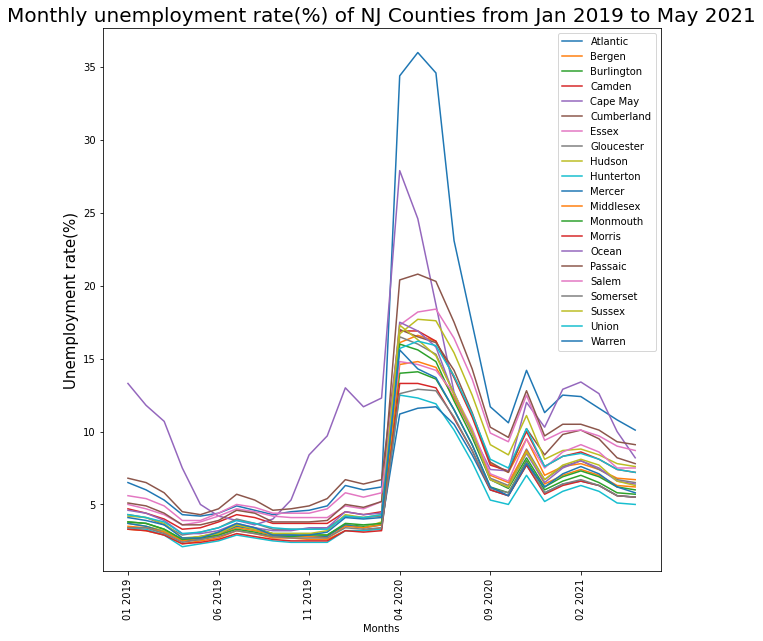

In [29]:
county_full_rows_transposed.reset_index().plot(x="Months", y=["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                                 "Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                                  "Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren"], figsize=(10,10), rot=90)
plt.title("Monthly unemployment rate(%) of NJ Counties from Jan 2019 to May 2021", size = 20)
plt.ylabel("Unemployment rate(%)", size = 15)
plt.savefig("Images/unmeployment_by_county.png")

In [18]:
county2019=county_full_rows.copy()
county2019 = county2019[["ANN. AV.'19'", "County"]]
county2019

,ANN. AV.'19',County
4,4.9,Atlantic County Unemployment Rate (%)
9,2.8,Bergen County Unemployment Rate (%)
14,3.2,Burlington County Unemployment Rate (%)
19,3.9,Camden County Unemployment Rate (%)
24,6.9,Cape May County Unemployment Rate (%)
29,5.3,Cumberland County Unemployment Rate (%)
34,4.3,Essex County Unemployment Rate (%)
39,3.5,Gloucester County Unemployment Rate (%)
44,3.2,Hudson County Unemployment Rate (%)
49,2.6,Hunterdon County Unemployment Rate (%)


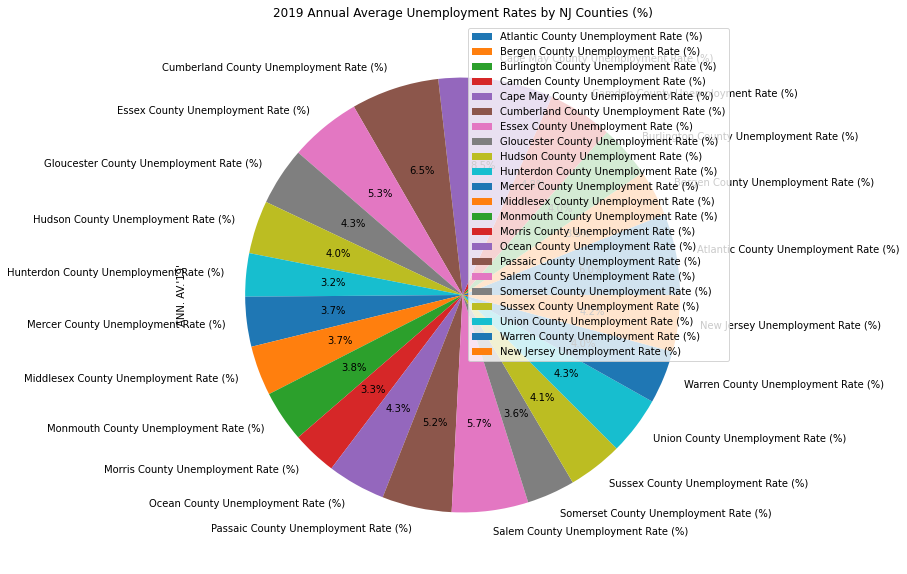

In [30]:

county2019.plot(kind="pie", 
                    y = "ANN. AV.'19'",  
                    labels = county_full_rows["County"], 
                    autopct="%1.1f%%", figsize=(10,10))
plt.title("2019 Annual Average Unemployment Rates by NJ Counties (%)")
plt.savefig("Images/2019_unmeployment_average(%)_by_county.png")                                     
plt.show()


In [20]:
county_full_rows_transposed2=county_full_rows.copy()
county_full_rows_transposed2 = county_full_rows_transposed2[["ANN. AV.'20'", "County"]]
county_full_rows_transposed2

,ANN. AV.'20',County
4,17.8,Atlantic County Unemployment Rate (%)
9,9.6,Bergen County Unemployment Rate (%)
14,8.2,Burlington County Unemployment Rate (%)
19,10.1,Camden County Unemployment Rate (%)
24,13.8,Cape May County Unemployment Rate (%)
29,10.8,Cumberland County Unemployment Rate (%)
34,11.7,Essex County Unemployment Rate (%)
39,9.3,Gloucester County Unemployment Rate (%)
44,10.6,Hudson County Unemployment Rate (%)
49,7.2,Hunterdon County Unemployment Rate (%)


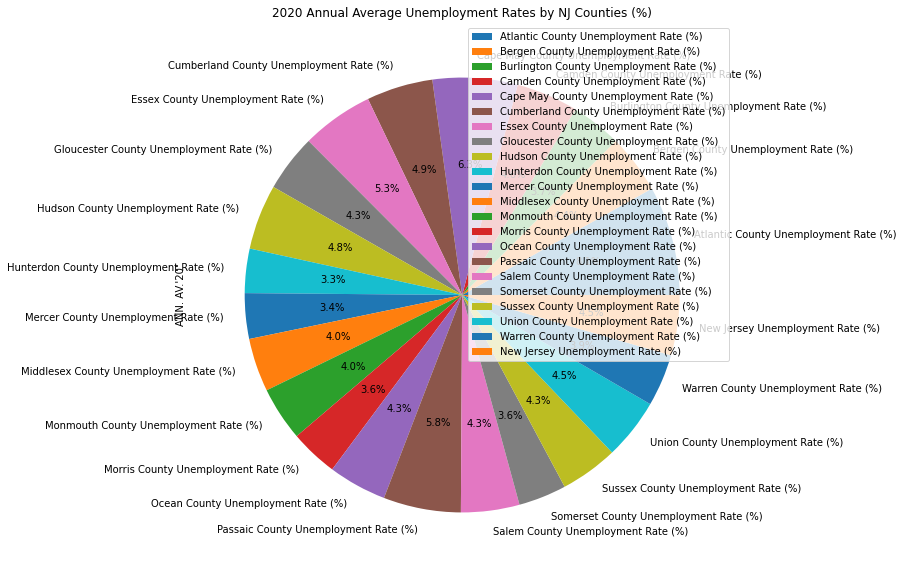

In [31]:

county_full_rows_transposed2.plot(kind="pie", 
                    y = "ANN. AV.'20'",  
                    labels = county_full_rows["County"], 
                    autopct="%1.1f%%", figsize=(10,10))
plt.title("2020 Annual Average Unemployment Rates by NJ Counties (%)")
plt.savefig("Images/2020_unemployment_average(%)_by_county.png")                                         
plt.show()


In [22]:
county_full_rows

,County,01 2019,02 2019,03 2019,04 2019,05 2019,06 2019,07 2019,08 2019,09 2019,...,09 2020,10 2020,11 2020,12 2020,ANN. AV.'20',01 2021,02 2021,03 2021,04 2021,05 2021
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,...,11.7,10.6,14.2,11.3,17.8,12.5,12.4,11.6,10.8,10.1
9,Bergen County Unemployment Rate (%),3.3,3.2,2.9,2.3,2.5,2.7,3.2,3,2.7,...,7.8,7.2,9.5,7.0,9.6,7.6,7.8,7.4,6.8,6.7
14,Burlington County Unemployment Rate (%),3.8,3.7,3.3,2.6,2.8,3,3.6,3.4,3,...,6.2,5.8,8.0,6.0,8.2,6.6,7.0,6.5,5.8,5.7
19,Camden County Unemployment Rate (%),4.7,4.4,4,3.3,3.4,3.8,4.3,4.1,3.7,...,7.7,7.3,10.0,7.6,10.1,8.3,8.6,8.1,7.4,7.2
24,Cape May County Unemployment Rate (%),13.3,11.8,10.7,7.5,5,4.2,3.9,3.6,4,...,7.4,7.3,12.0,10.3,13.8,12.9,13.4,12.6,10.0,8.2
29,Cumberland County Unemployment Rate (%),6.8,6.5,5.8,4.5,4.3,4.7,5.7,5.3,4.6,...,7.9,7.2,10.2,8.4,10.8,9.8,10.1,9.5,8.2,7.8
34,Essex County Unemployment Rate (%),5,4.7,4.3,3.6,3.8,4.2,4.7,4.5,4.2,...,9.9,9.3,12.5,9.4,11.7,10.0,10.1,9.7,9.0,8.7
39,Gloucester County Unemployment Rate (%),4.3,4.1,3.6,2.9,3.1,3.4,4,3.7,3.3,...,6.8,6.3,8.8,6.7,9.3,7.6,8.0,7.4,6.7,6.5
44,Hudson County Unemployment Rate (%),3.7,3.5,3.2,2.6,2.8,3.1,3.5,3.3,3,...,9.1,8.4,11.1,8.1,10.6,8.7,8.8,8.4,7.8,7.6
49,Hunterdon County Unemployment Rate (%),3.4,3.3,2.9,2.1,2.3,2.5,2.9,2.7,2.5,...,5.3,5.0,7.0,5.2,7.2,5.9,6.3,5.9,5.1,5.0


In [23]:
county2021=county3.iloc[range(4, len(county3), 5)]
county2021

,County,01 2021,02 2021,03 2021,04 2021,05 2021
4,Atlantic County Unemployment Rate (%),12.5,12.4,11.6,10.8,10.1
9,Bergen County Unemployment Rate (%),7.6,7.8,7.4,6.8,6.7
14,Burlington County Unemployment Rate (%),6.6,7.0,6.5,5.8,5.7
19,Camden County Unemployment Rate (%),8.3,8.6,8.1,7.4,7.2
24,Cape May County Unemployment Rate (%),12.9,13.4,12.6,10.0,8.2
29,Cumberland County Unemployment Rate (%),9.8,10.1,9.5,8.2,7.8
34,Essex County Unemployment Rate (%),10.0,10.1,9.7,9.0,8.7
39,Gloucester County Unemployment Rate (%),7.6,8.0,7.4,6.7,6.5
44,Hudson County Unemployment Rate (%),8.7,8.8,8.4,7.8,7.6
49,Hunterdon County Unemployment Rate (%),5.9,6.3,5.9,5.1,5.0


In [24]:
county2021_complete= county2021.T
county2021_complete
county2021_transposed= county2021_complete.iloc[1:32]
county2021_transposed.columns =["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                                      "Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                                      "Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren", "New Jersey"]
county2021_transposed.index.name="Months"
county2021_transposed

,Atlantic,Bergen,Burlington,Camden,Cape May,Cumberland,Essex,Gloucester,Hudson,Hunterton,...,Monmouth,Morris,Ocean,Passaic,Salem,Somerset,Sussex,Union,Warren,New Jersey
Months,,,,,,,,,,,,,,,,,,,,,
01 2021,12.5,7.6,6.6,8.3,12.9,9.8,10,7.6,8.7,5.9,...,6.9,6.3,7.5,10.5,8.6,6.4,7.7,8.3,7.1,8
02 2021,12.4,7.8,7,8.6,13.4,10.1,10.1,8,8.8,6.3,...,7.3,6.6,8,10.5,9.1,6.7,8.1,8.5,7.6,8.2
03 2021,11.6,7.4,6.5,8.1,12.6,9.5,9.7,7.4,8.4,5.9,...,6.9,6.3,7.5,10.1,8.6,6.3,7.7,8.1,7.1,7.8
04 2021,10.8,6.8,5.8,7.4,10,8.2,9,6.7,7.8,5.1,...,6.2,5.6,6.6,9.3,7.5,5.6,6.6,7.4,6.2,7.1
05 2021,10.1,6.7,5.7,7.2,8.2,7.8,8.7,6.5,7.6,5,...,6,5.5,6.4,9.1,7.5,5.5,6.3,7.2,5.8,6.9


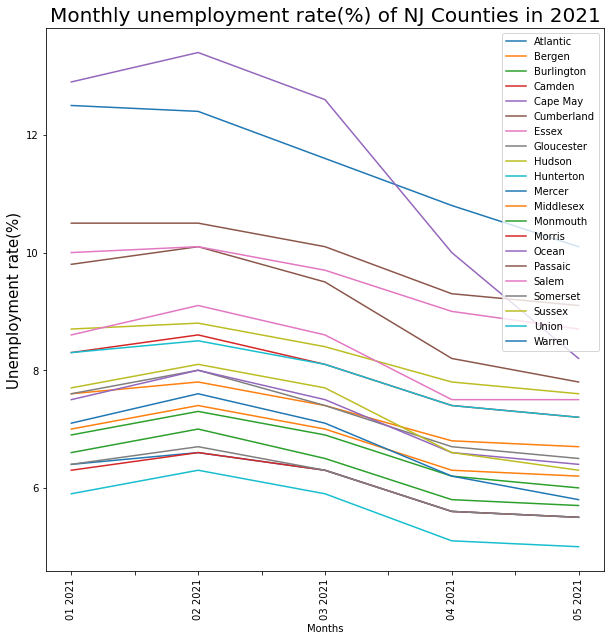

In [32]:
county2021_transposed.reset_index().plot(x="Months", y=["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                                 "Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                                  "Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren"], figsize=(10,10), rot=90)
plt.title("Monthly unemployment rate(%) of NJ Counties in 2021", size = 20)
plt.ylabel("Unemployment rate(%)", size = 15)
plt.savefig("Images/unmeployment_by_county_in_2021.png")